In [241]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

plt.style.use('default')

## Question 1

In [242]:
def f(x):
    return np.cos(x)-np.sin(x)

def bisection(f,tol,a,b,act):
    c=(a+b)/2
    i=0
    n=[i]
    error = [abs(f(c)-act)]
    while abs(f(c))>tol:
        i = i+1
        n.append(i)
        if f(a)*f(c) <0:
            b=c
        elif f(b)*f(c)<0:
            a=c
        c=(a+b)/2
        error.append(abs(c-act))
    return c,i,n,error
    

In [243]:
c_bis, i, n_bis, error_bis=bisection(f,1e-14,0,1,np.pi/4)
print(c_bis,i)

0.7853981633974456 44


### It took 44 iterations to find the root within the specified tolerance

## Question 2

In [244]:
def J(x):
    return -np.cos(x)-np.sin(x)

def Newton_Raphson(f,J,x0,tol,act):
    if f(x0)==0 :
        return x0
    
    x1 = x0 -f(x0)/J(x0)

    i=0
    n=[i]
    error = [abs(f(c)-act)]
    while abs(f(x1))>tol:
        i = i+1
        n.append(i)
        x1 = x0 -f(x0)/J(x0)
        x0=x1
        error.append(abs(x1-act))
        
    return x1,i,n,error



    
    

In [245]:
x,i ,n_newt,error_newt= Newton_Raphson(f,J,0.1,1e-14,np.pi/4)
print(x,i)

0.7853981633974484 4


In [246]:
def Secant(f,x0,tol,act):
    if f(x0)==0 :
        return x0
    J = (f(x0+0.001*x0)-f(x0))/(0.001*x0)
    
    x1 = x0 -f(x0)/J

    i=0
    n=[i]
    error = [abs(f(c)-act)]
    while abs(f(x1))>tol:
        i = i+1
        n.append(i)
        J = (f(x0+0.01*x0)-f(x0))/(0.01*x0)
        x1 = x0 -f(x0)/J
        x0=x1
        error.append(abs(x1-act))
        
    return x1,i,n,error

## Question 3

In [247]:
x,i ,n_sec,error_sec = Secant(f,0.1,1e-14,np.pi/4)

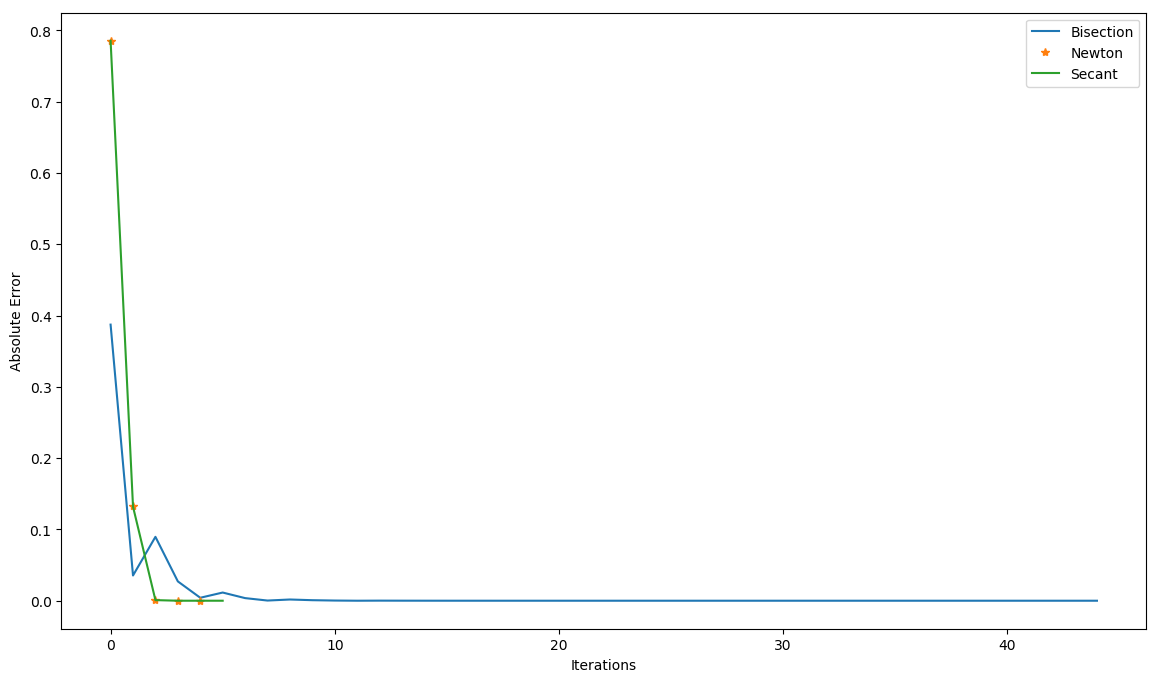

In [248]:
fig, axes = plt.subplots(figsize=(14,8))    
plt.plot(n_bis,error_bis,label="Bisection")
plt.plot(n_newt,error_newt,"*",label="Newton")
plt.plot(n_sec,error_sec,label="Secant")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Absolute Error")
plt.show()

As can be seen, all three methods converged but it took the bisection method about 11 times as long(44 iterations vs 4) compared to the secant and Newton methods.

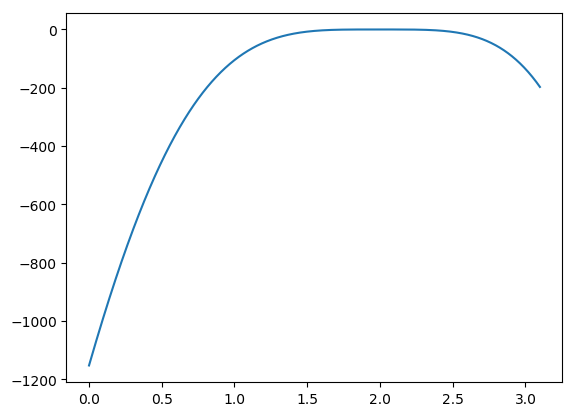

In [258]:
def f(x):
    return x**7 -6*x**6 -28*x**5 +232*x**4 -336*x**3 -544*x**2 +1728*x - 1152

def J(x):
    return 7*x**6 -36*x**5 -140*x**4 +928*x**3 -1008*x**2 -1088*x +1728


x2 = np.linspace(0,3.1,1000)
plt.plot(x2,f(x2))


In [250]:
act=2
c_bis, i, n_bis, error_bis=bisection(f,1e-14,0,3.1,act)

KeyboardInterrupt: 

In [233]:
x,i ,n_newt,error_newt= Newton_Raphson(f,J,1,1e-14,2)

x,i ,n_sec,error_sec = Secant(f,1,1e-14,act)

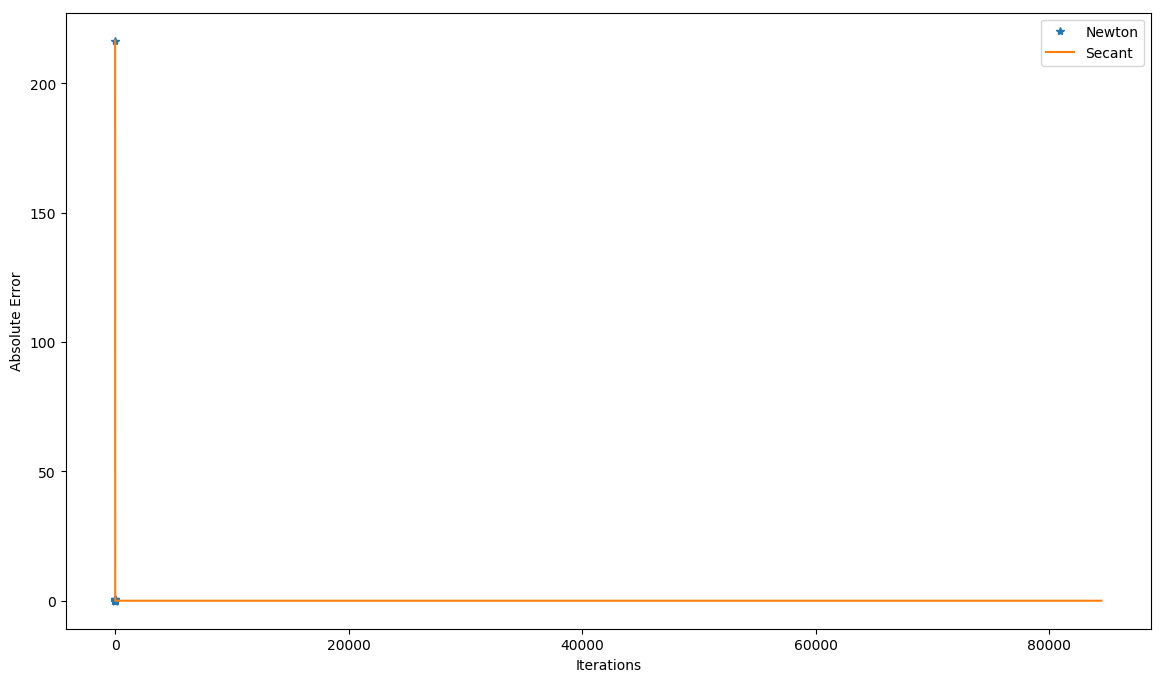

In [234]:
fig, axes = plt.subplots(figsize=(14,8))    
plt.plot(n_newt,error_newt,"*",label="Newton")
plt.plot(n_sec,error_sec,label="Secant")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Absolute Error")
plt.show()

For this polynomial convergence wasn't achieved with the bisection method since $f(a=0)<0 $ and $f(b=3.1)<0$.

Convergence was very rapid with the newton method compared to the secant method.

## Question 4

In [218]:
def iter_newton(x0,f,J,imax = 1e6,tol = 1e-5):
    x=x0
    for i in range(int(imax)):
        J = J(x0[0],x0[1])# calculate jacobian J = df(x)/dY(x) 
        Y = f(x0[0],x0[1]) # calculate function Y = f(x)
        dx = np.linalg.solve(J,Y) # solve for increment from Jdx = Y 
        
        x -= dx # step x by dx 
        if np.linalg.norm(dx)<tol: # break if converged
            print('converged.')
            break
    return x

def f(x1,x2):
    return ([3*x1**2-x1*x2-1, x1*x2+x2**2-2])

def J(x1,x2):
    return ([[6*x1+x2,x1],[x2,2*x2+x1]])

In [219]:
x0 =np.array([1,1],dtype= float)
iter_newton(x0,f,J)

TypeError: 'list' object is not callable

### I could't get this one to work 
